✅ Zeros replaced in battery_drain_percentage with mean value: 2498.55


C:\Users\puppa\AppData\Local\Temp\ipykernel_13484\3342031486.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=q1_result, x='app_name', y='battery_drain_percentage', palette='viridis')


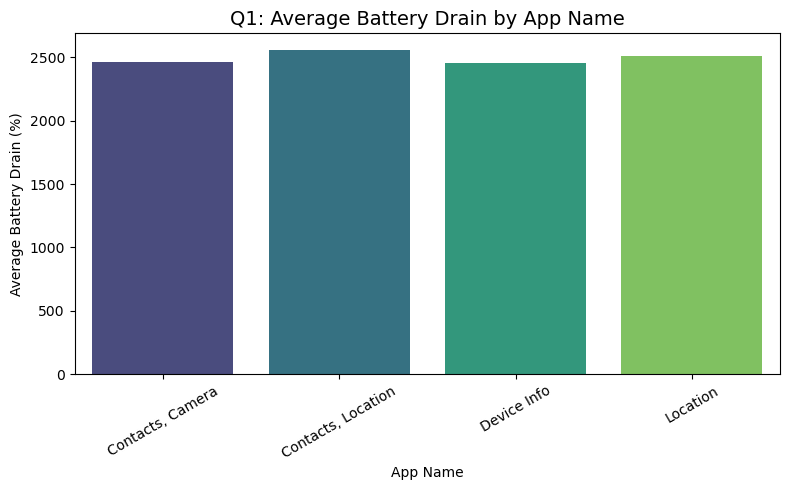

C:\Users\puppa\AppData\Local\Temp\ipykernel_13484\3342031486.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  q2_result = data.groupby('screen_time_range')['battery_drain_percentage'].mean().reset_index()
C:\Users\puppa\AppData\Local\Temp\ipykernel_13484\3342031486.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=q2_result, x='screen_time_range', y='battery_drain_percentage', palette='coolwarm')


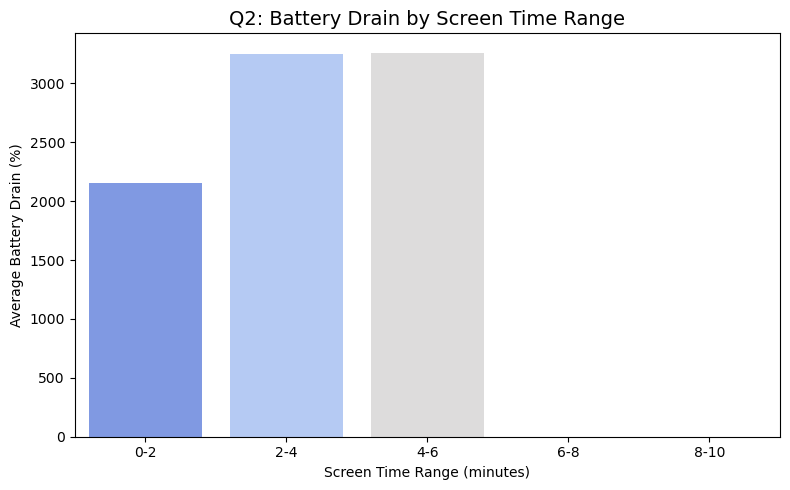

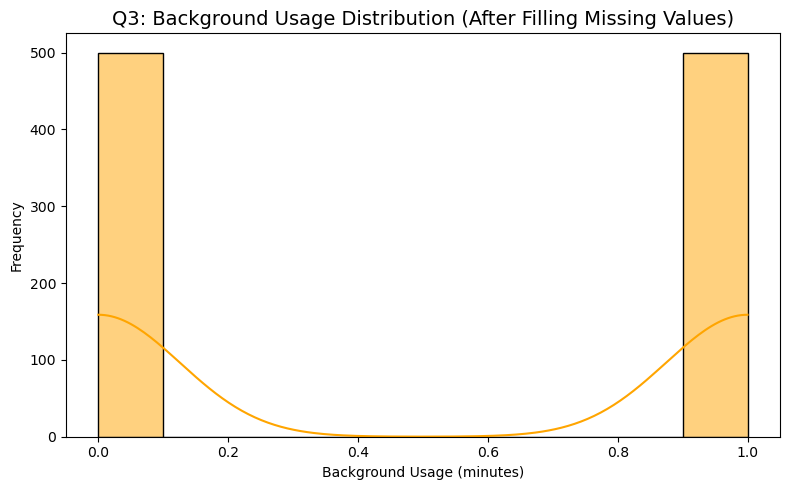

Missing background_usage_minutes before: 0, after: 0

🔹 Correlation between Screen Time and Battery Drain: 0.589


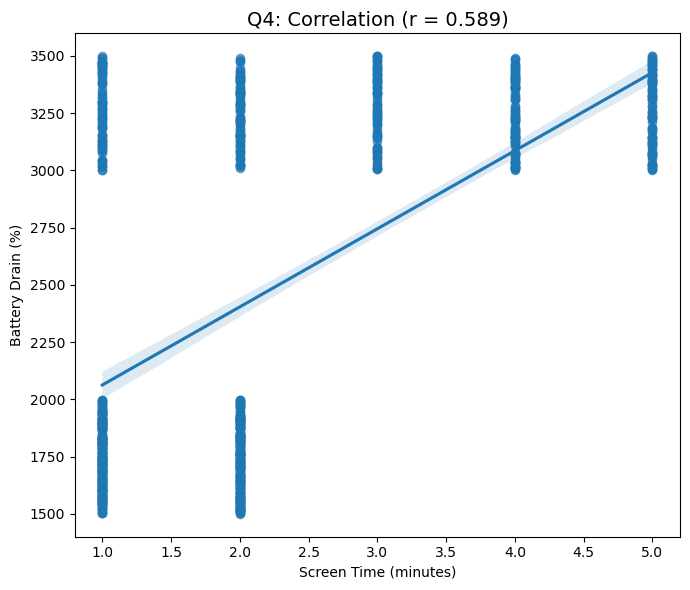

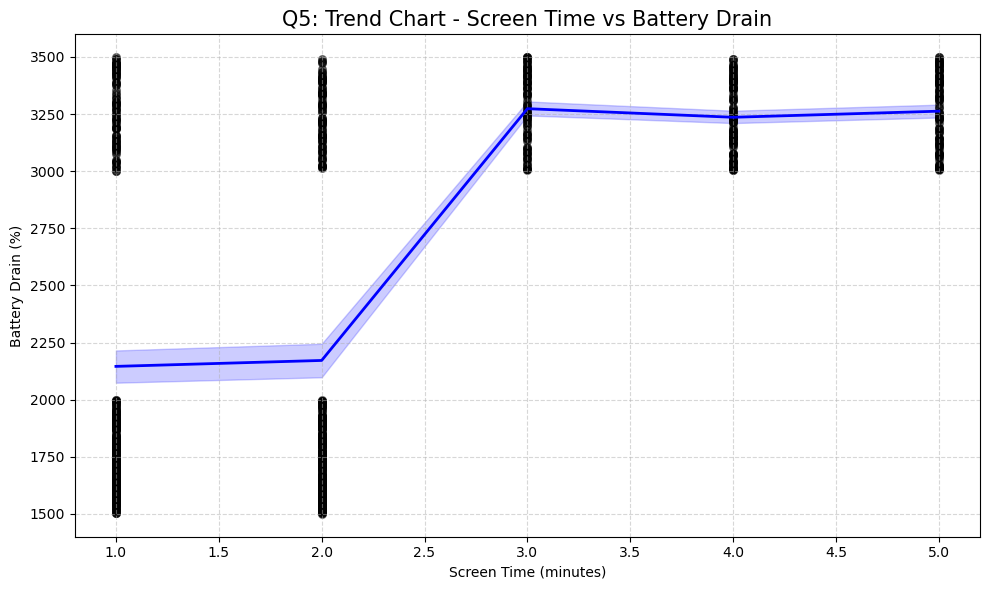

In [1]:
# ---------------------------------------------------------------
# 📘 MOBILE BATTERY USAGE ANALYTICS PROJECT (Graphical Version)
# Dataset: spyware_detection_dataset2.csv
# ---------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# STEP 1: LOAD AND PREPARE DATA
# -----------------------------
df = pd.read_csv("C:\\Users\\puppa\\Downloads\\spyware_detection_dataset2.csv")

# Rename columns to align with project expectations
data = df.rename(columns={
    'Data_Collection_Practices': 'app_name',
    'Third_Party_Libraries': 'screen_time_minutes',
    'Background_Processes': 'background_usage_minutes',
    'Privacy_Policy_Length': 'battery_drain_percentage'
})[['app_name', 'screen_time_minutes', 'background_usage_minutes', 'battery_drain_percentage']]

# Replace zeros in battery_drain_percentage with mean
mean_drain = data['battery_drain_percentage'].replace(0, np.nan).mean()
data['battery_drain_percentage'] = data['battery_drain_percentage'].replace(0, mean_drain)

print("✅ Zeros replaced in battery_drain_percentage with mean value:", round(mean_drain, 2))


# ===============================================================
# Q1️⃣: Average battery_drain_percentage by app_name
# ===============================================================

q1_result = data.groupby('app_name')['battery_drain_percentage'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=q1_result, x='app_name', y='battery_drain_percentage', palette='viridis')
plt.title("Q1: Average Battery Drain by App Name", fontsize=14)
plt.xlabel("App Name")
plt.ylabel("Average Battery Drain (%)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


# ===============================================================
# Q2️⃣: Group by screen_time_minutes range
# ===============================================================

bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']
data['screen_time_range'] = pd.cut(data['screen_time_minutes'], bins=bins, labels=labels, include_lowest=True)

q2_result = data.groupby('screen_time_range')['battery_drain_percentage'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=q2_result, x='screen_time_range', y='battery_drain_percentage', palette='coolwarm')
plt.title("Q2: Battery Drain by Screen Time Range", fontsize=14)
plt.xlabel("Screen Time Range (minutes)")
plt.ylabel("Average Battery Drain (%)")
plt.tight_layout()
plt.show()


# ===============================================================
# Q3️⃣: Replace missing background_usage values with zero
# ===============================================================

missing_before = data['background_usage_minutes'].isna().sum()
data['background_usage_minutes'] = data['background_usage_minutes'].fillna(0)
missing_after = data['background_usage_minutes'].isna().sum()

# Visual check: distribution after replacement
plt.figure(figsize=(8,5))
sns.histplot(data['background_usage_minutes'], bins=10, kde=True, color='orange')
plt.title("Q3: Background Usage Distribution (After Filling Missing Values)", fontsize=14)
plt.xlabel("Background Usage (minutes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

print(f"Missing background_usage_minutes before: {missing_before}, after: {missing_after}")


# ===============================================================
# Q4️⃣: Correlate screen_time and battery_drain
# ===============================================================

correlation = data['screen_time_minutes'].corr(data['battery_drain_percentage'])
print("\n🔹 Correlation between Screen Time and Battery Drain:", round(correlation, 3))

# Visualize correlation
plt.figure(figsize=(7,6))
sns.regplot(data=data, x='screen_time_minutes', y='battery_drain_percentage', scatter_kws={'alpha':0.6})
plt.title(f"Q4: Correlation (r = {round(correlation,3)})", fontsize=14)
plt.xlabel("Screen Time (minutes)")
plt.ylabel("Battery Drain (%)")
plt.tight_layout()
plt.show()


# ===============================================================
# Q5️⃣: Trend Chart (Screen Time vs Battery Drain)
# ===============================================================

plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='screen_time_minutes', y='battery_drain_percentage', color='blue', linewidth=2)
plt.scatter(data['screen_time_minutes'], data['battery_drain_percentage'], alpha=0.5, color='black', s=30)
plt.title("Q5: Trend Chart - Screen Time vs Battery Drain", fontsize=15)
plt.xlabel("Screen Time (minutes)")
plt.ylabel("Battery Drain (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
